In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import json

In [20]:
result_dirs = ['/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/tempBanana2']

Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/tempBanana2


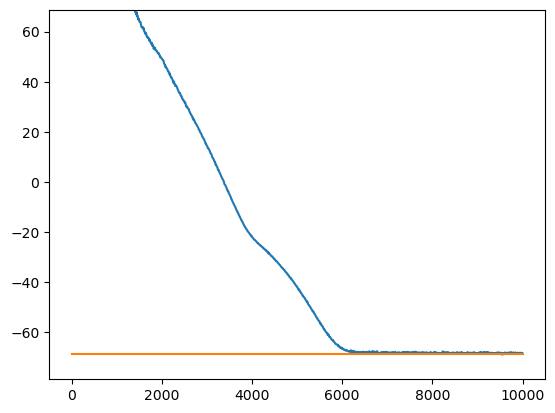

In [21]:
for result_dir in result_dirs:
    print(f"Reading results from {result_dir}")
    loss_df = pd.read_csv(f"{result_dir}/loss.csv", names=['iteration', 'loss'])
    log_df = pd.read_csv(f"{result_dir}/log.csv", names=['iteration', 'loss', 'log_likelihood', 'kl_divergence'])
    reference_density = np.genfromtxt(f"{result_dir}/toysynth_density.txt")
    #load params.pt
    opt_params = torch.load(f"{result_dir}/params.pt")
    with open(f"{result_dir}/config.json", 'r') as f:
        config = json.load(f)
    
    # print("Loss DataFrame:")
    # print(loss_df.head())
    
    # print("\nLog DataFrame:")
    # print(log_df.head())
    
    # # Example analysis: Calculate mean loss and log likelihood
    # mean_loss = loss_df['loss'].mean()
    # mean_log_likelihood = log_df['log_likelihood'].mean()
    
    # print(f"\nMean Loss: {mean_loss}")
    # print(f"Mean Log Likelihood: {mean_log_likelihood}")
    plt.plot(loss_df['iteration'], loss_df['loss'], label='Loss')
    plt.plot(loss_df['iteration'], -np.ones_like(loss_df['iteration'])*reference_density, label='Log Likelihood')
    plt.ylim(-reference_density - 10, reference_density )


In [24]:
opt_params_numpy = {k: v.cpu().numpy() for k, v in opt_params.items()}

In [26]:
opt_params_numpy['gen.sigma_a'], opt_params_numpy['gen.sigma_x']



(array([0.09771755], dtype=float32), array([0.05134301], dtype=float32))

In [27]:
config

{'out_dir': 'results/tempBanana2/',
 'data': '/homes/ar2342/scratch/sasha-model-optimization/_data_er5/test',
 'model': 'toy',
 'klmethod': 'analytical',
 'reuse': None,
 'cuda_index': 1,
 'bs': 512,
 'n': 128,
 't_episode': 100,
 'max_iter': 10000,
 'enable_kl_grad': True,
 'print_params': False,
 'save_matrices_every': 1000,
 'toydata_OUphi': 0.9,
 'toydata_OUsigma_process': 0.05,
 'toydata_OUsigma_obs': 0.1,
 'toymodel_OUphi': 0.9,
 'toymodel_OUsigma_process': 0.05,
 'toymodel_OUsigma_obs': 0.1,
 'optimize_toy_noises': True}